# Predicting Admission Probability using Classification Techniques

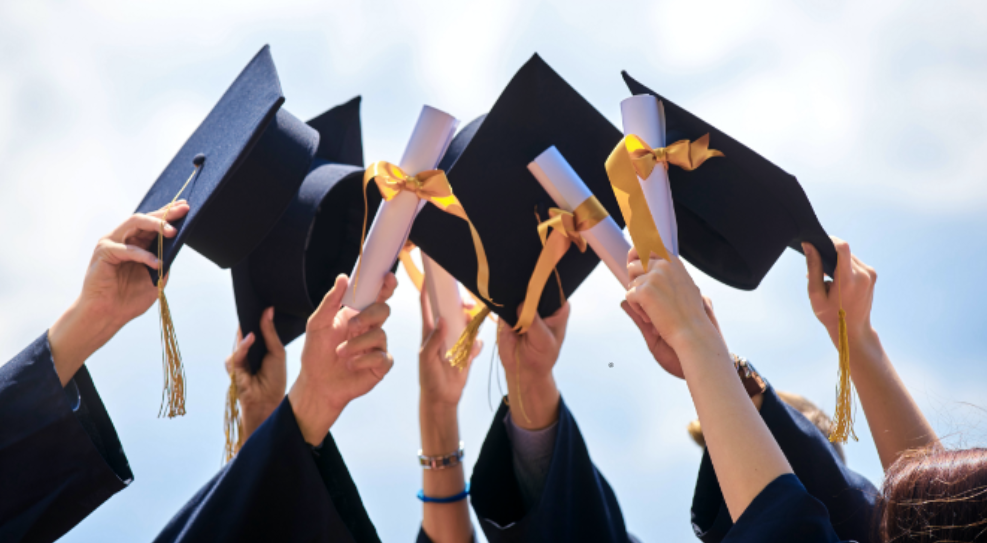

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

## Reading the Data
#### Data is available in CSV file 

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
# Total rows and columns 
df.shape

(500, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Variable Identification

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
# Removing irrelevant column
df = df.drop(['Serial No.'], axis = 1)

In [9]:
# Finding Null Values
print(df.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


## Identifying and Removing Outliers

In [10]:
# Checking for non-numeric values in selected columns
non_numeric_values = df[['University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']].apply(lambda x: pd.to_numeric 
                                                                                        (x, errors='coerce')).isnull().sum()
print("Non-Numeric Values:")
print(non_numeric_values)

Non-Numeric Values:
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
dtype: int64


<AxesSubplot:>

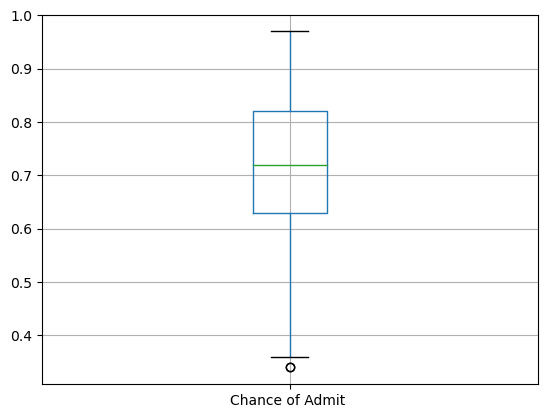

In [11]:
df.boxplot(column =['Chance of Admit '])

<AxesSubplot:>

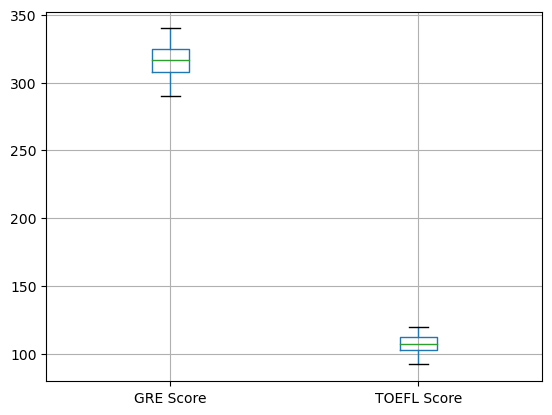

In [12]:
df.boxplot(column = ['GRE Score','TOEFL Score'])

<AxesSubplot:>

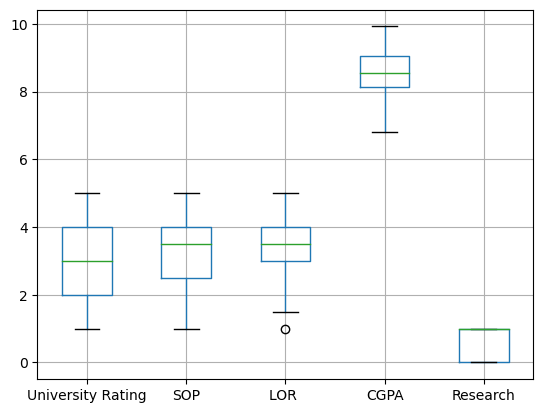

In [13]:
df.boxplot(column = ['University Rating', 'SOP','LOR ', 'CGPA', 'Research',])

## Removing Outliers using IQR Method

In [14]:
df1 = df.copy()

In [15]:
# Calculating Quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64


In [16]:
# Identifying Outliers
df_out1 = df1[((df1 <(Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
92,298,98,2,4.0,3.0,8.03,0,0.34
347,299,94,1,1.0,1.0,7.34,0,0.42
376,297,96,2,2.5,2.0,7.43,0,0.34


In [17]:
# Removing Outiler
df_out = df1[~((df1 <(Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df = df_out.copy()
print(df.shape)

(497, 8)


## Graphical Representation

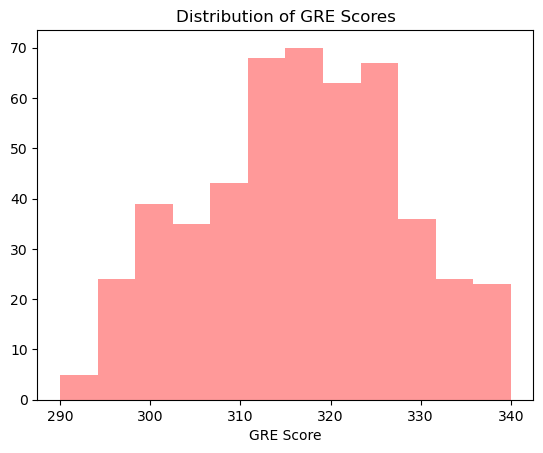

In [18]:
# Show GRE Score
fig = sns.distplot(df['GRE Score'], kde = False, color = 'red')
plt.title("Distribution of GRE Scores")
plt.show()

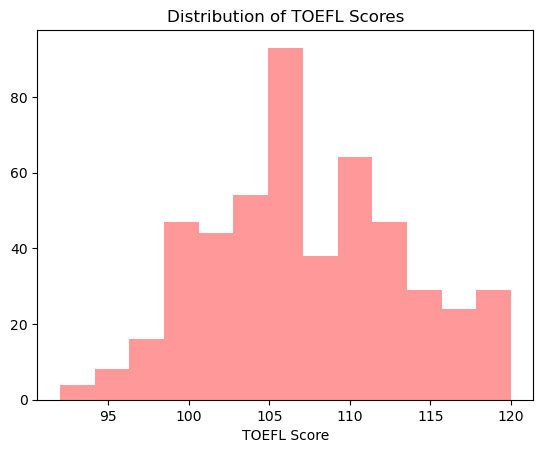

In [19]:
# Show TOEFL Score
fig = sns.distplot(df['TOEFL Score'], kde = False, color = 'red')
plt.title("Distribution of TOEFL Scores")
plt.show()

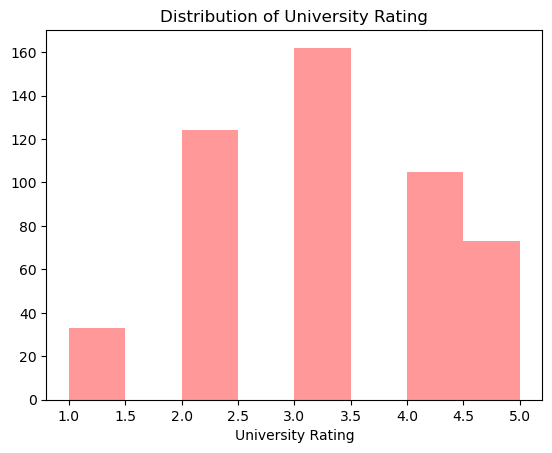

In [20]:
# Show University Rating
fig = sns.distplot(df['University Rating'], kde = False, color = 'red')
plt.title("Distribution of University Rating")
plt.show()

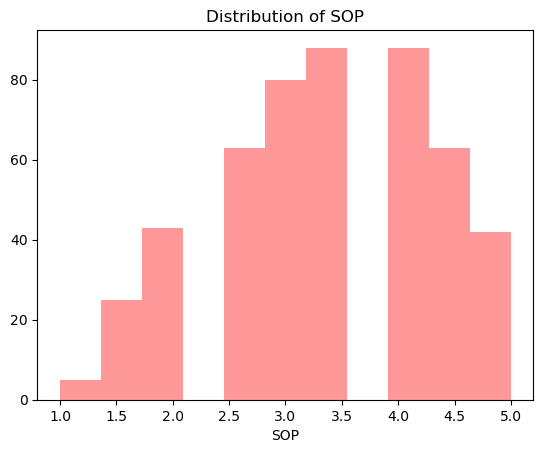

In [21]:
# Show SOP
fig = sns.distplot(df['SOP'], kde = False, color = 'red')
plt.title("Distribution of SOP")
plt.show()

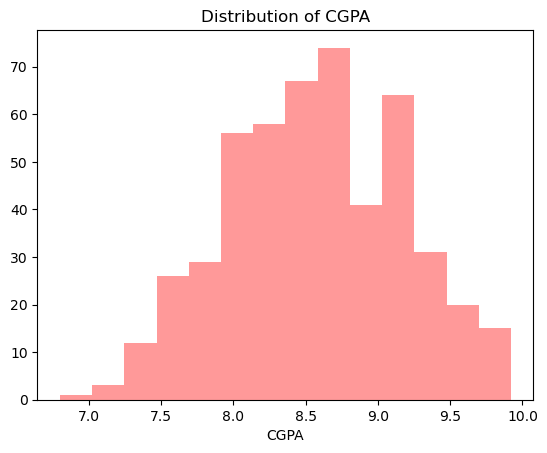

In [22]:
# Show CGPA
fig = sns.distplot(df['CGPA'], kde = False, color = 'red')
plt.title("Distribution of CGPA")
plt.show()

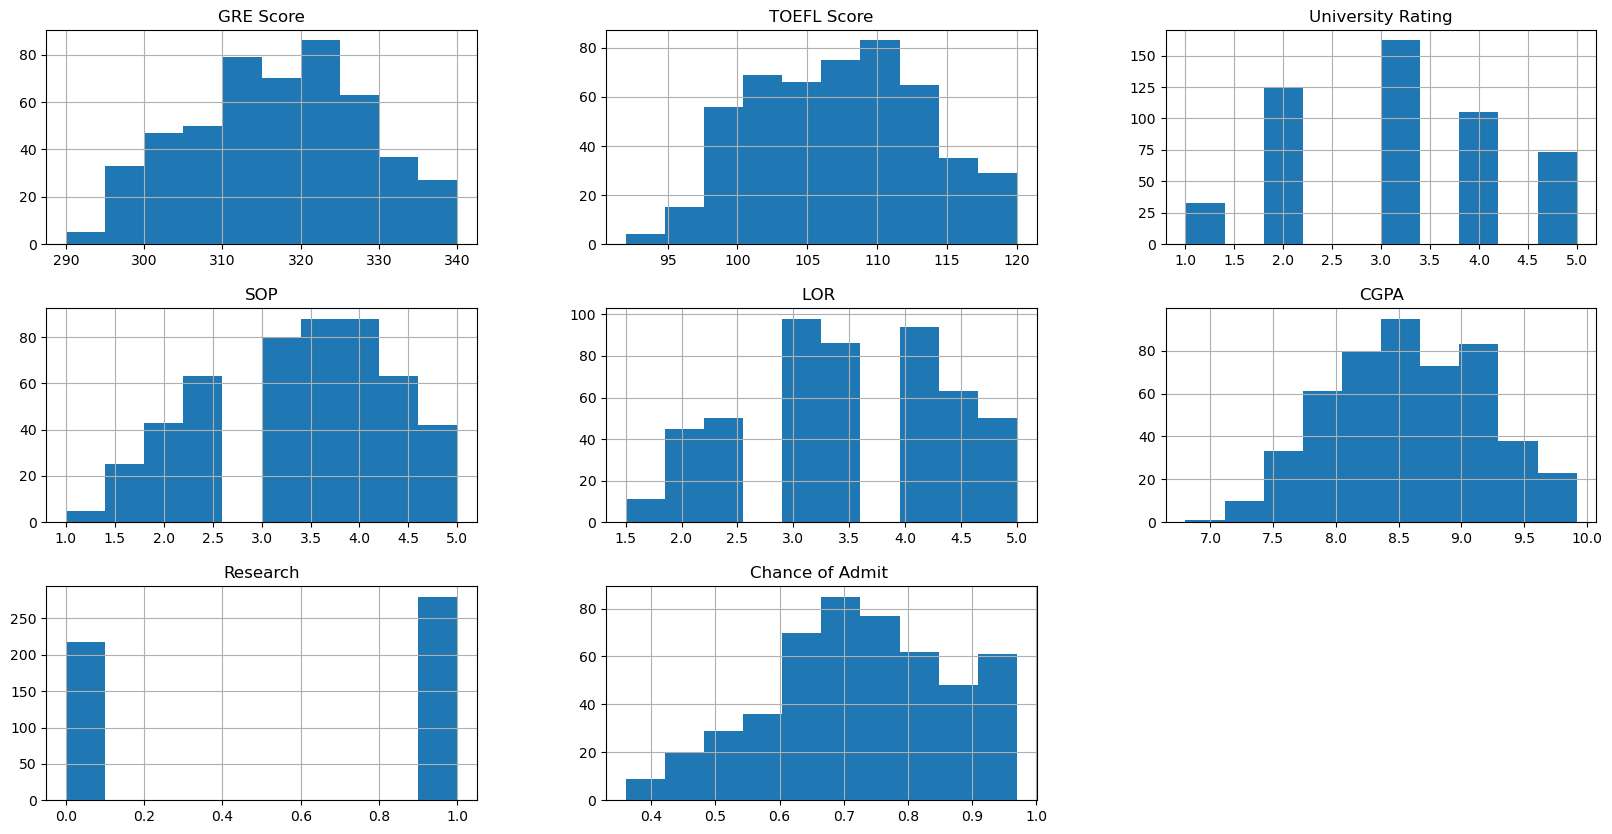

In [23]:
df.hist(figsize = (20,10))
plt.show()

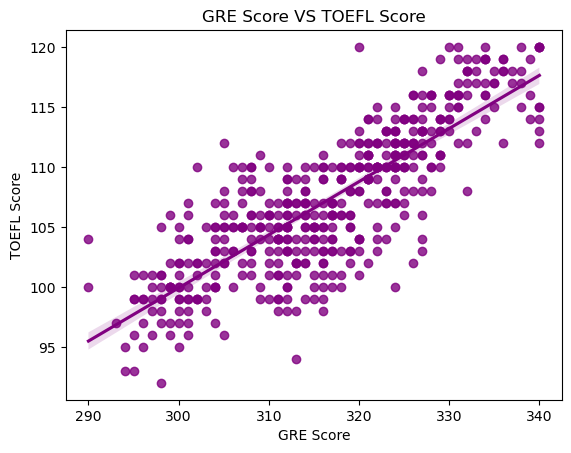

In [24]:
fig = sns.regplot(x = "GRE Score", y = "TOEFL Score", data=df, color = 'purple')
plt.title("GRE Score VS TOEFL Score")
plt.show()

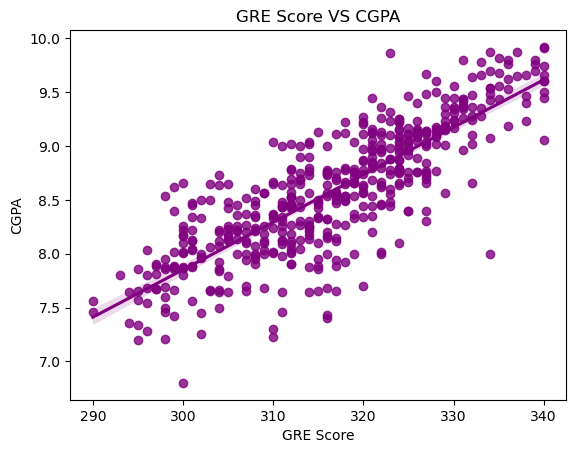

In [25]:
fig = sns.regplot(x = "GRE Score", y = "CGPA", data=df, color = 'purple')
plt.title("GRE Score VS CGPA")
plt.show()

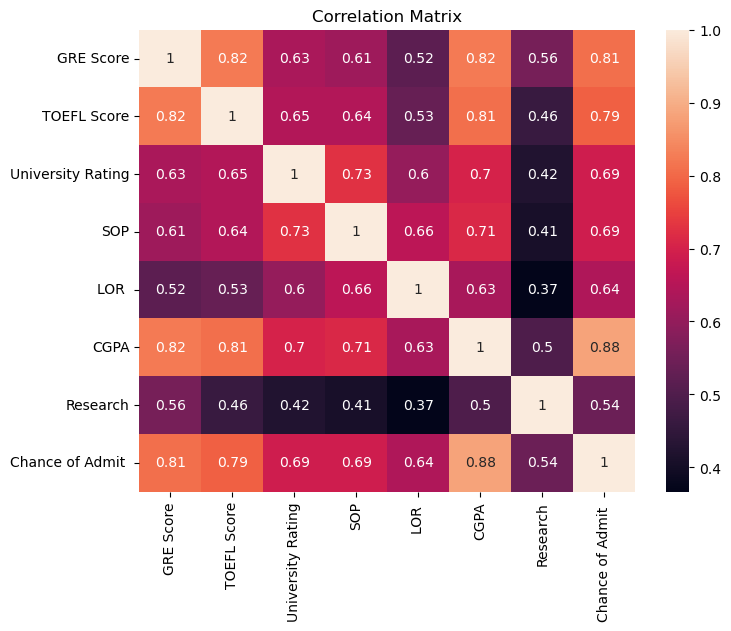

In [26]:
plt.figure(figsize=(8, 6))
# Creating a heatmap to visualize the correlation between variables in the dataset
sns.heatmap(df.corr(), annot=True)
# Annotating the heatmap with correlation values
plt.title("Correlation Matrix")
plt.show()

**"Implementation of Regression Model for Admission Prediction"**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [28]:
# Splitting the Data
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [29]:
# Convert continuous target variable to discrete classes
y_class = (y > 0.5).astype(int)

In [30]:
# Splitting into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

In [31]:
# Model Training
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.94      0.98      0.96        90

    accuracy                           0.92       100
   macro avg       0.80      0.69      0.73       100
weighted avg       0.91      0.92      0.91       100



In [33]:
# Prediction on New Data
new_data = pd.DataFrame({
    'GRE Score': [320],
    'TOEFL Score': [110],
    'University Rating': [4],
    'SOP': [4.5],
    'LOR ': [4.5],
    'CGPA': [9.0],
    'Research': [1]
})
chance_of_admit = model.predict(new_data)
print("Chance of Admit:", chance_of_admit)

Chance of Admit: [1]


**In conclusion, the classification model predicts a high probability of admission (with a predicted value of 1) based on the given input data. However, the model's predictions should be interpreted as probabilities rather than definitive outcomes. Other factors and criteria should also be considered in the admission process.**

**The model's performance can be evaluated using metrics like accuracy, precision, recall, and F1-score, along with the classification report. Further validation on unseen data and comprehensive analysis is recommended to ensure the model's reliability and generalizability. Admission decisions should consider the model's predictions along with a holistic evaluation of the applicant's profile**